In [23]:
# Dependencies and Setup
import re
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import datetime as datetime
import seaborn as sns
import folium
import csv
import plotly.graph_objs as go 
pd.options.mode.chained_assignment = None
import json
import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [24]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')


In [25]:
# File to Load (Remember to Change These)
undergrad_tuition_data_to_load = "data/sample.csv"

In [26]:
# Read the undergraduate tuition Data
df = pd.read_csv(undergrad_tuition_data_to_load)
#undergrad_df.head()
df.head()
#student_df

,index,State,public4Year_total,public4Year_tuitionFees,public4Year_room,public4Year_board,public4Year_outStateTotal,privateTotal,privatetuitionFees,privateRoom,privateBoard,public2YInState,public2YOutState
0,1,AL,19052.005,9466.105,5385.984,4199.916,23999.508,24709.536,15421.537,4676.622,4611.377,4362.02,9074.6
1,2,AK,17370.129,7210.342,5830.018,4329.769,21431.489,26131.55,18876.363,3622.961,3632.226,3820,3820
2,3,AZ,21490.559,10056.575,6696.872,4737.112,25061.481,22558.535,13139.738,5099.811,4318.986,2129.2,7931.35
3,4,AR,16871.207,7924.042,4958.633,3988.532,19322.961,29803.687,21709.817,4100.08,3993.79,3195.11,4582.08
4,5,CA,21355.599,7896.422,7531.504,5927.673,28253.183,44721.64,31495.075,7467.173,5759.392,1261.82,7120.07


In [27]:
#convert dataframe to numeric
df = df.convert_objects(convert_numeric=True)
df.head()

,index,State,public4Year_total,public4Year_tuitionFees,public4Year_room,public4Year_board,public4Year_outStateTotal,privateTotal,privatetuitionFees,privateRoom,privateBoard,public2YInState,public2YOutState
0,1,AL,19052.005,9466.105,5385.984,4199.916,23999.508,24709.536,15421.537,4676.622,4611.377,4362.02,9074.60
1,2,AK,17370.129,7210.342,5830.018,4329.769,21431.489,26131.550,18876.363,3622.961,3632.226,3820.00,3820.00
2,3,AZ,21490.559,10056.575,6696.872,4737.112,25061.481,22558.535,13139.738,5099.811,4318.986,2129.20,7931.35
3,4,AR,16871.207,7924.042,4958.633,3988.532,19322.961,29803.687,21709.817,4100.080,3993.790,3195.11,4582.08
4,5,CA,21355.599,7896.422,7531.504,5927.673,28253.183,44721.640,31495.075,7467.173,5759.392,1261.82,7120.07


In [28]:
# df =('public4Year_total','public4Year_tuitionFees','public4Year_room','public4Year_board','public4Year_outStateTotal')
# value_list = np.random.randint(0,40000, size = len(df))
# pos_list = np.arange(len(df))
# plt.bar(pos_list, value_list, color = '.40')
# plt.xticks(pos_list, df)

# plt.show()

In [29]:
df.head()

,index,State,public4Year_total,public4Year_tuitionFees,public4Year_room,public4Year_board,public4Year_outStateTotal,privateTotal,privatetuitionFees,privateRoom,privateBoard,public2YInState,public2YOutState
0,1,AL,19052.005,9466.105,5385.984,4199.916,23999.508,24709.536,15421.537,4676.622,4611.377,4362.02,9074.60
1,2,AK,17370.129,7210.342,5830.018,4329.769,21431.489,26131.550,18876.363,3622.961,3632.226,3820.00,3820.00
2,3,AZ,21490.559,10056.575,6696.872,4737.112,25061.481,22558.535,13139.738,5099.811,4318.986,2129.20,7931.35
3,4,AR,16871.207,7924.042,4958.633,3988.532,19322.961,29803.687,21709.817,4100.080,3993.790,3195.11,4582.08
4,5,CA,21355.599,7896.422,7531.504,5927.673,28253.183,44721.640,31495.075,7467.173,5759.392,1261.82,7120.07


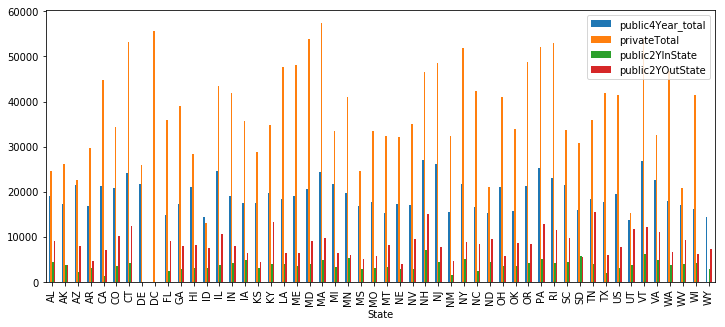

In [30]:
df.plot(x="State", y=["public4Year_total", "privateTotal", "public2YInState","public2YOutState"], figsize=(12,5),kind="bar")
plt.ylim(bottom=10)
plt.savefig("Public_Sch_vs Private_Sch_cost.png")

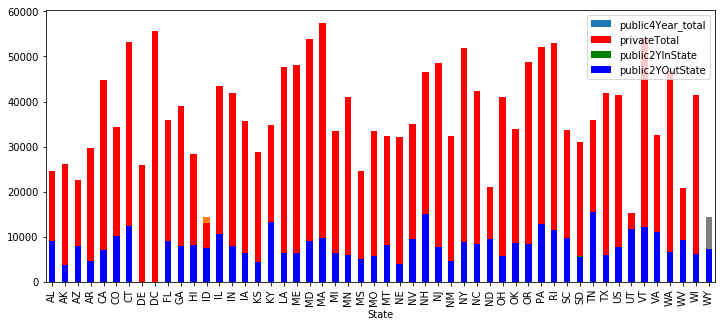

In [31]:
y = np.random.rand(10,4)
y[:,0]= np.arange(10)

ax = df.plot(x="State", y="public4Year_total", figsize=(12,5),kind="bar")
df.plot(x="State", y="privateTotal", kind="bar", ax=ax, color="r")
df.plot(x="State", y="public2YInState", kind="bar", ax=ax, color="g")
df.plot(x="State", y="public2YOutState", kind="bar", ax=ax, color="b")
# plt.ylim(top=40)
# plt.ylim(bottom=15)
plt.savefig("Public_Sch_vs Private_Sch_cost_stack.png")
plt.show()


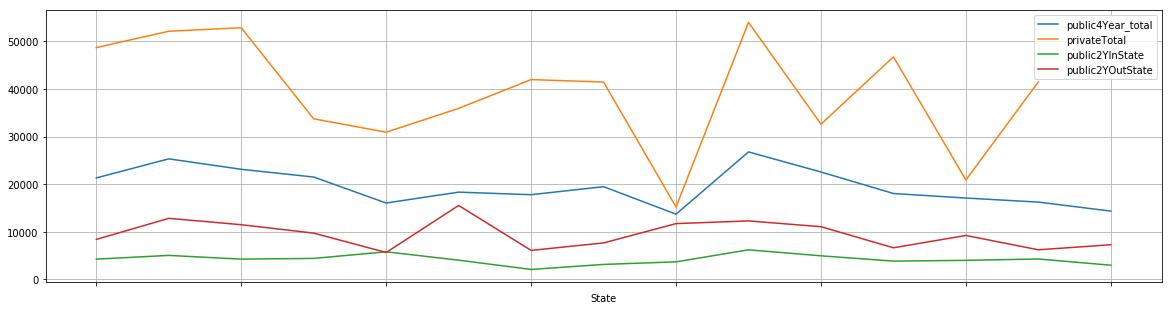

In [32]:
df[-15:].plot(x='State', y=["public4Year_total", "privateTotal", "public2YInState","public2YOutState"], figsize=(20,5), grid=True)
plt.savefig("Public_Sch_vs Private_Sch_cost_line.png")
plt.show()

In [53]:
#1) Data Preparation

with open ('data/us-states.json') as f:
     map_data = json.load(f)
# #sns.heatmap(students.dropna())
# #print(map_data)
# #students = pd.read_csv('data/sample.csv')
# students = df


students_map = folium.Map(location=[48, -102], zoom_start=3)
#students_map = dict(type='choropleth',
students_map.choropleth(
#    locations=['data/us-states.json'], 
#    locationmode='USA-states', 
#    text=['Michigan', 'Colorado', 'Florida', 'Indiana'],
#    z=[1.0,2.0,3.0,4.0],
#    colorbar=dict(title="USA States")
#            )
    geo_data=map_data,
    name='choropleth',
    data=students,
    columns=['State',"public2YInState","privateTotal","public4Year_total"],
    key_on='id',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='cost of school by State'
)


folium.LayerControl().add_to(students_map)
students_map.save('map_student.html')

students_map 